In [1]:
# Importing the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df = pd.read_csv('Sonar.csv', names = range(0,61), header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Exploratory Data Analysis (EDA)

In [3]:
# Check the dataset shape
df.shape

(208, 61)

In [4]:
# knowing the datatypes of the dataset 
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [5]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

As we know from the data description that there are 2 categories M - Mines and R for Rocks
we will however need to encode the string data into numeric.. 

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df.iloc[:, 60] = labelencoder.fit_transform(df.iloc[:, 60])

In [7]:
df[60].value_counts()

0    111
1     97
Name: 60, dtype: int64

We can now see that the M is encoded to 0 and R to 1

In [8]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60      int32
Length: 61, dtype: object

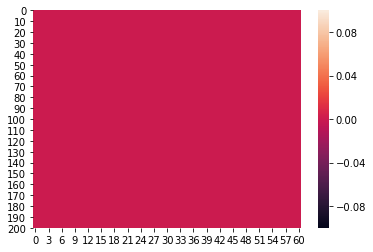

In [9]:
# checking for missing values by plotting a heat map
sns.heatmap(df.isnull())
plt.show()

Data is clean - no missing values

In [10]:
# Confirming the missing values exist 
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


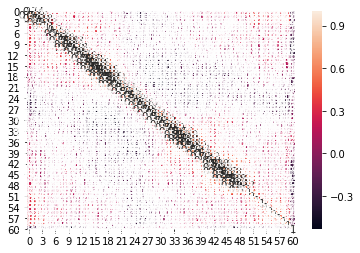

In [12]:
sns.heatmap(df.corr(),annot=True)
plt.show()

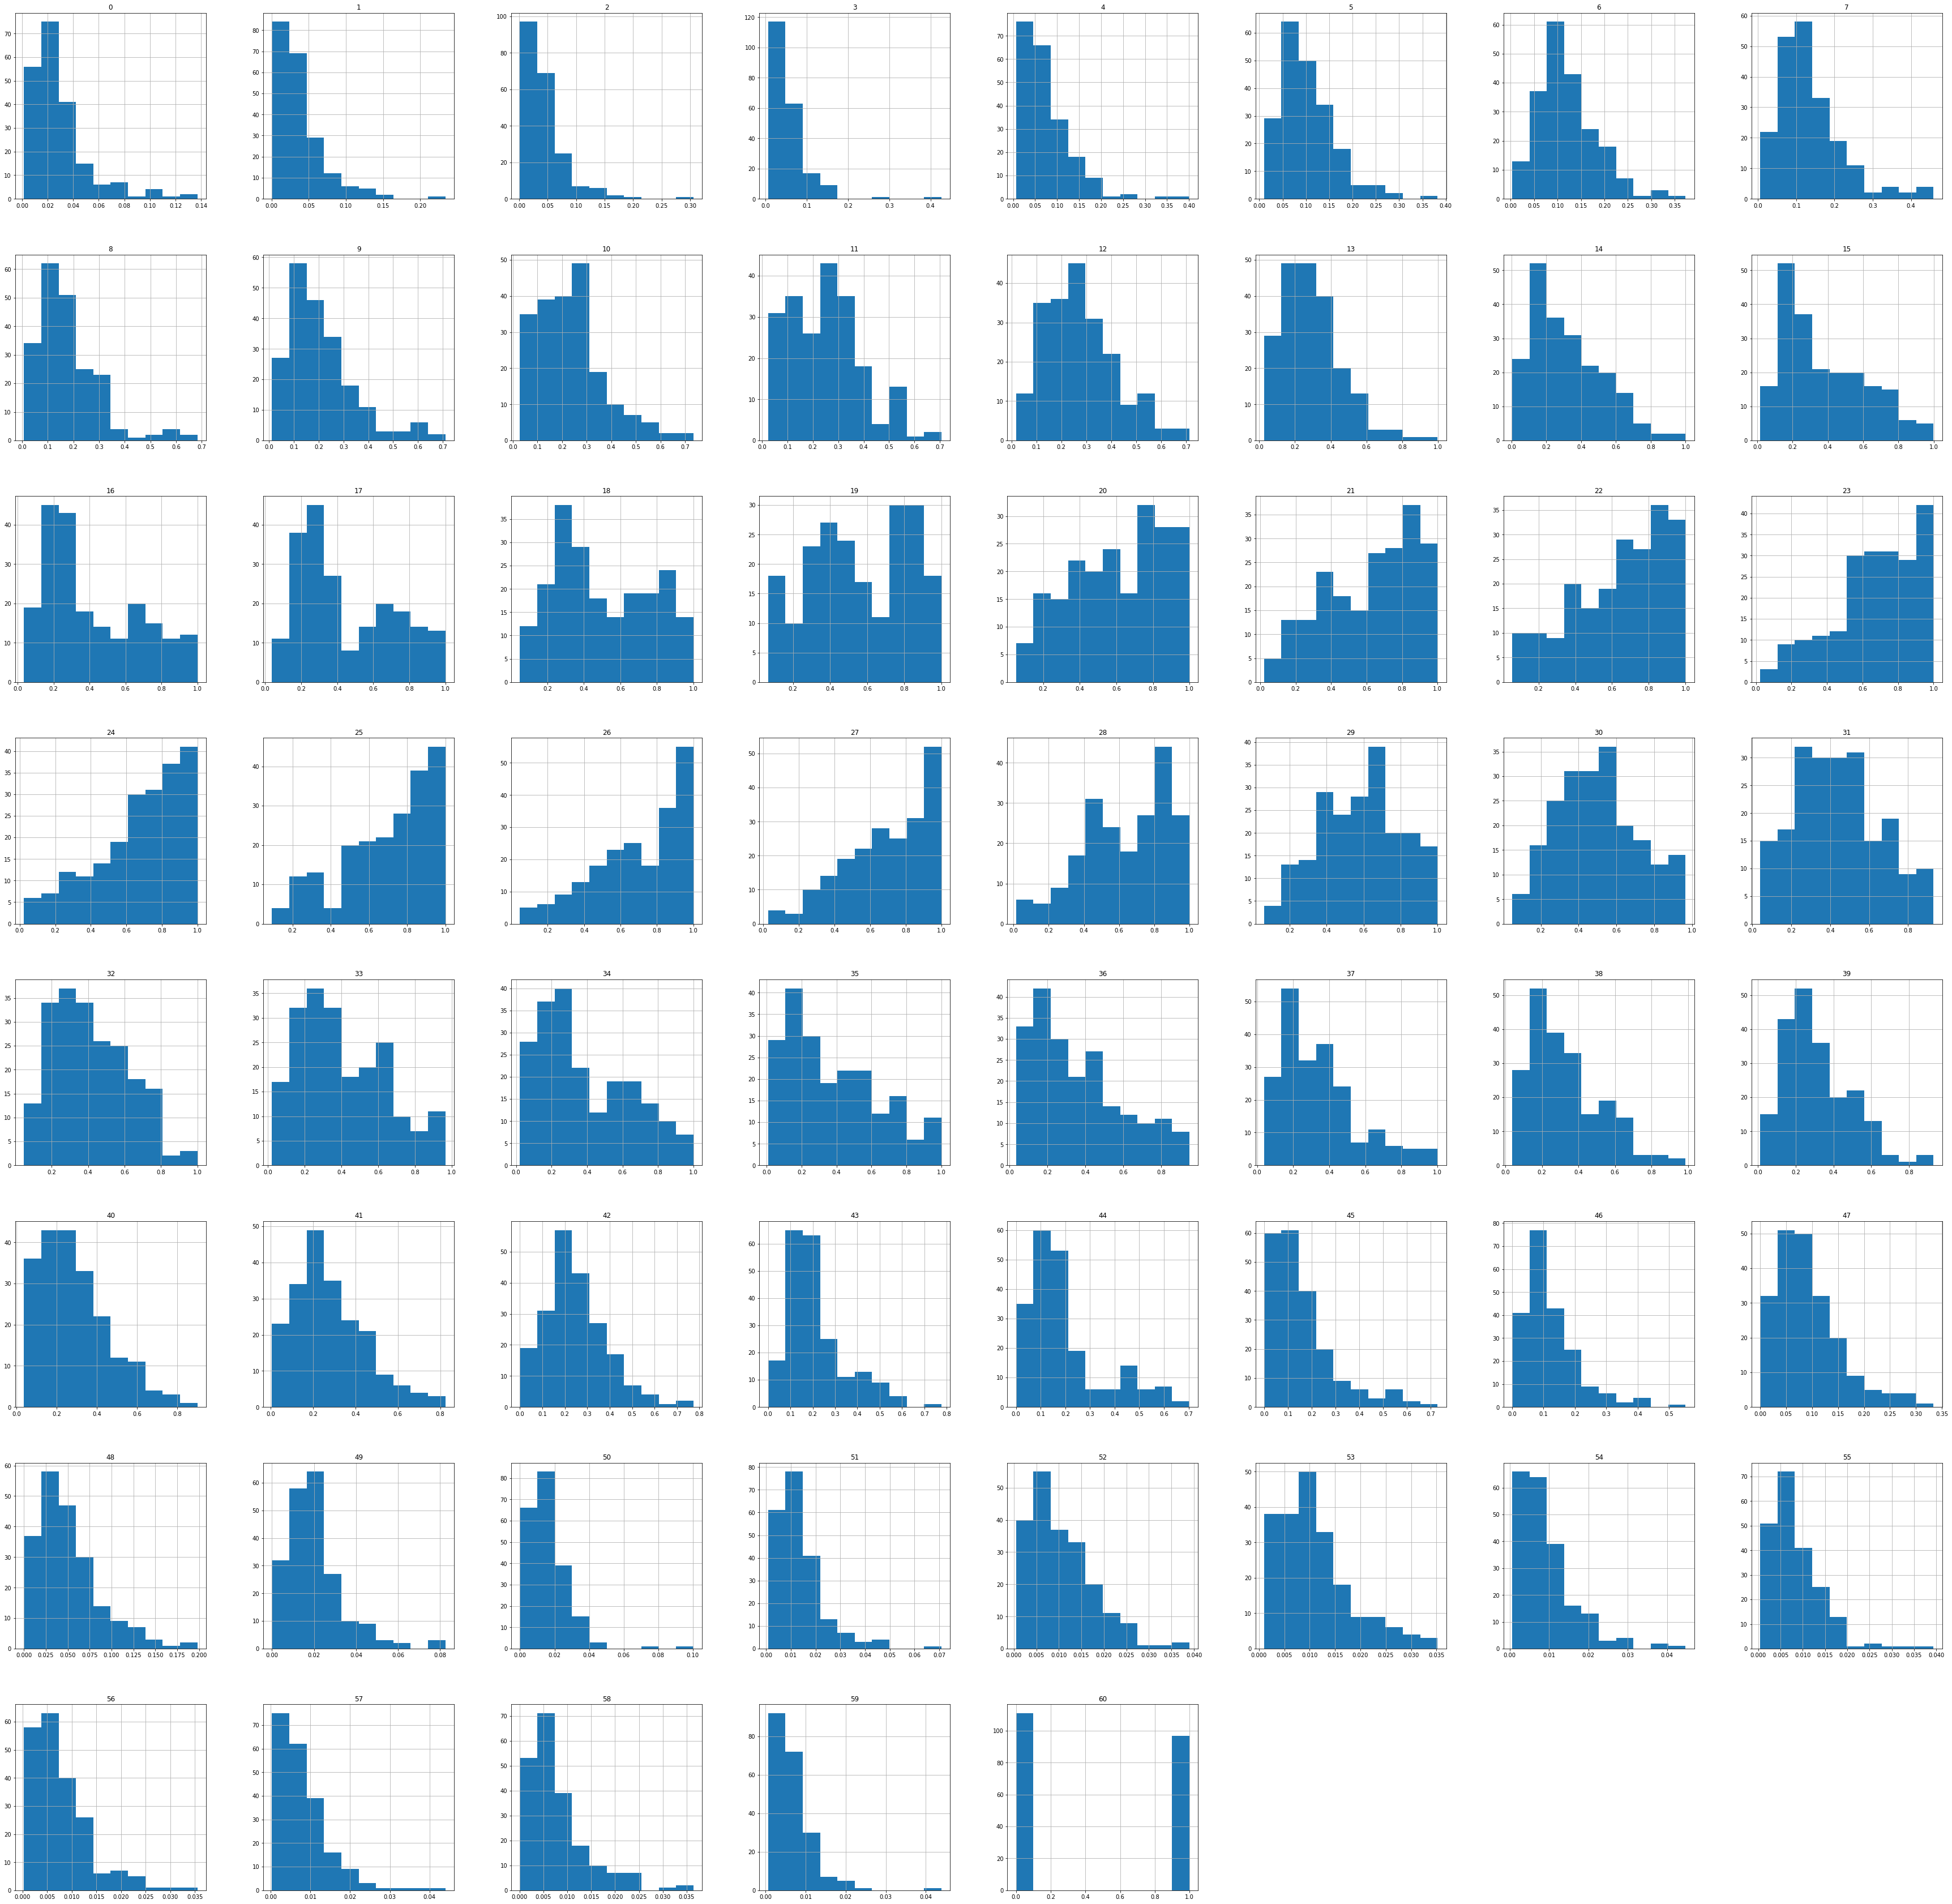

In [13]:
df.hist(figsize=(61,61))
plt.show()

In [14]:
X = df.iloc[:, 0:-1]  # Our Independent variable set 
y = df.iloc[:, -1] # Our Dependent variable set 

In [15]:
print(X.shape)
print(y.shape)

(208, 60)
(208,)


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=59)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(166, 60)
(166,)
(42, 60)
(42,)


In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_curve,auc

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_curve,auc

In [20]:
KNN=KNeighborsClassifier()
SVC=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=8)
GNB=GaussianNB()

In [21]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SVC))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

In [22]:
# Edit 
Model = []
F1_score=[]
Accuracy_score=[]
Precision_score=[]
CVS = []
rocscore = []
for name, model in models:
    Model.append(name)
    ml=model
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    F1_score.append(f1_score(y_test,pred))
    Accuracy_score.append(accuracy_score(y_test,pred)*100)
    Precision_score.append(precision_score(y_test,pred)*100)
    sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    CVS.append(sc*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    rocscore.append(roc_auc*100)
    

In [23]:
resultset=pd.DataFrame({'Model':Model,
                        'F1_score':F1_score,
                        'Accuracy_score': Accuracy_score, 
                        'Precision Score': Precision_score,
                        'Cross_Val_Score': CVS,
                        'ROC_Score':rocscore
                       })
resultset

,Model,F1_score,Accuracy_score,Precision Score,Cross_Val_Score,ROC_Score
0,KNeighborsClassifier,0.709677,78.571429,73.333333,60.023810,76.682692
1,SVC,0.692308,80.952381,90.000000,57.121212,76.201923
2,LogisticRegression,0.702703,73.809524,61.904762,67.086580,75.240385
3,DecisionTreeClassifier,0.628571,69.047619,57.894737,60.101732,68.990385
4,GaussianNB,0.571429,57.142857,46.153846,60.361472,60.576923


Based on the above table, we can see that SVC performs better than other models - so finalizing the SVC model


In [24]:
# Serialization of the model
import joblib
joblib.dump(SVC,'sonar.obj')

['sonar.obj']

In [25]:
model=joblib.load('sonar.obj')

In [26]:
model.predict(x_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])